# **Global Biodiversity Information Facility (GBIF) Dataset Analysis**  
This pipeline is used to retrive specific datasets from GBIF through it's API using rgbif package in R.

### **Loading R packages and libraries**

In [2]:
requiredPackages = c("rgbif","tidyverse", "raster")
cat("\nChecking if needed packages are installed... 'rgbif' and 
'tidyverse'. \nIncase of errors, install each individually and 
troubleshoot any errors that may occur")
for(p in requiredPackages)
    if(p %in% rownames(installed.packages()) == FALSE) {
        install.packages(p)
    } else {
        cat("\nExcellent", p, " already installed. loading", p, "...")
        suppressMessages(library(p, character.only = T))
    }
    cat("\nDone...\n")


Checking if needed packages are installed... 'rgbif' and 
'tidyverse'. 
Incase of errors, install each individually and 
troubleshoot any errors that may occur
Excellent rgbif  already installed. loading rgbif ...
Excellent tidyverse  already installed. loading tidyverse ...

Warning message:
“package ‘tidyr’ was built under R version 3.6.2”



Excellent raster  already installed. loading raster ...

Warning message:
“package ‘raster’ was built under R version 3.6.2”
Warning message:
“package ‘sp’ was built under R version 3.6.2”



Done...


### **Setting needed variables**

In [3]:
output_dir="/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/gbif"
GBIF_USER="kibet"
GBIF_EMAIL="kibet.gilbert@ymail.com"
GBIF_PWD="@Kybet"
search_name="psychodidae"
#search_rank="family"

### **searching database for keys**

In [4]:
key <- name_backbone( name = search_name, rank = NULL, kingdom = NULL,
                      phylum = NULL, class = NULL, order = NULL,
                      family = search_name, genus = NULL)$familyKey
key1 <- name_backbone( name = "Phlebotomus", rank = NULL, kingdom = NULL,
                      phylum = NULL, class = NULL, order = NULL,
                      family = NULL, genus = "Phlebotomus")$genusKey
key1

[1] 1640274

### **Searching the database for occurence data**

In [139]:
occ_search(taxonKey = key1, return = "all")

Records found [3367] 
Records returned [500] 
No. unique hierarchies [21] 
No. media records [500] 
No. facets [0] 
Args [limit=500, offset=0, taxonKey=1640274, fields=all] 
# A tibble: 500 x 109
   key   scientificName decimalLatitude decimalLongitude issues datasetKey
   <chr> <chr>                    <dbl>            <dbl> <chr>  <chr>     
 1 2238… Phlebotomus p…            40.9             14.3 cdrou… 50c9509d-…
 2 2250… BOLD:ACY9483              16.5            101.  gass84 040c5662-…
 3 2244… Phlebotomus s…            36.6             27.2 cudc,… c3969d4c-…
 4 2244… Phlebotomus n…            37.6             26.0 cudc,… c3969d4c-…
 5 2244… Phlebotomus n…            37.6             26.2 cudc,… c3969d4c-…
 6 2244… Phlebotomus s…            37.6             26.1 cudc,… c3969d4c-…
 7 2244… Phlebotomus t…            36.6             27.1 cudc,… c3969d4c-…
 8 2244… Phlebotomus t…            36.6             27.1 cudc,… c3969d4c-…
 9 2244… Phlebotomus t…            37.6             26

### **Setting the download-output directory**

In [5]:
setwd(output_dir)
dir.create(file.path(paste(search_name,"-",
                           key, sep = "")))
output_file_dir=paste(output_dir,"/", 
                  search_name, "-", key, sep= "" )
output_file_dir

Warning message in dir.create(file.path(paste(search_name, "-", key, sep = ""))):
“'psychodidae-9164' already exists”


[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/gbif/psychodidae-9164"

### **Taking a look at GBIF maps**  
This will dowload a map of the occurence of a particular taxonomic group within a specified region

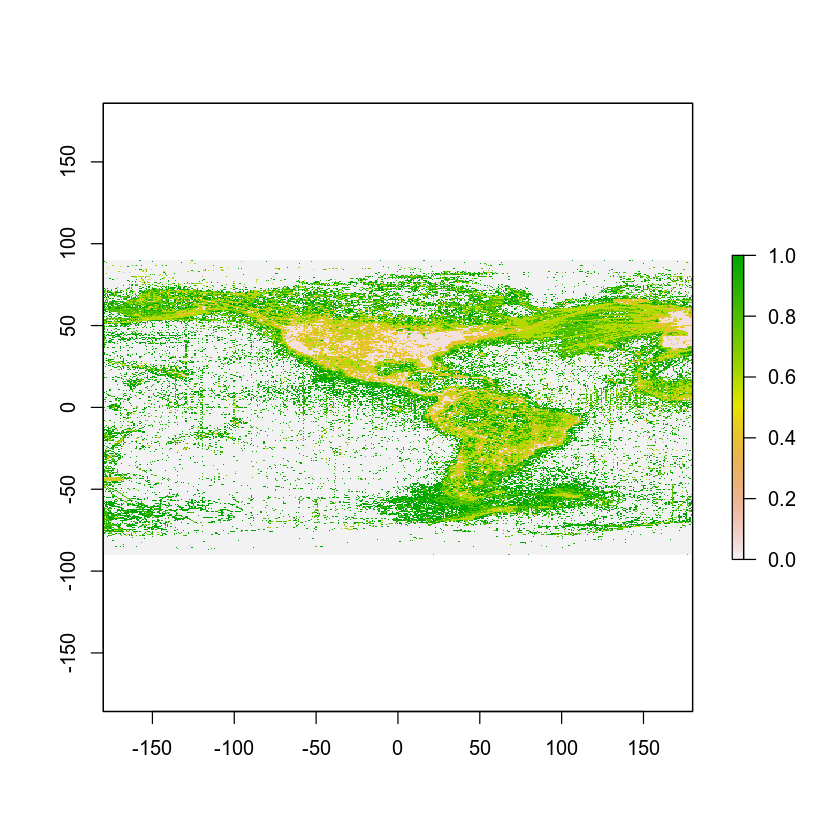

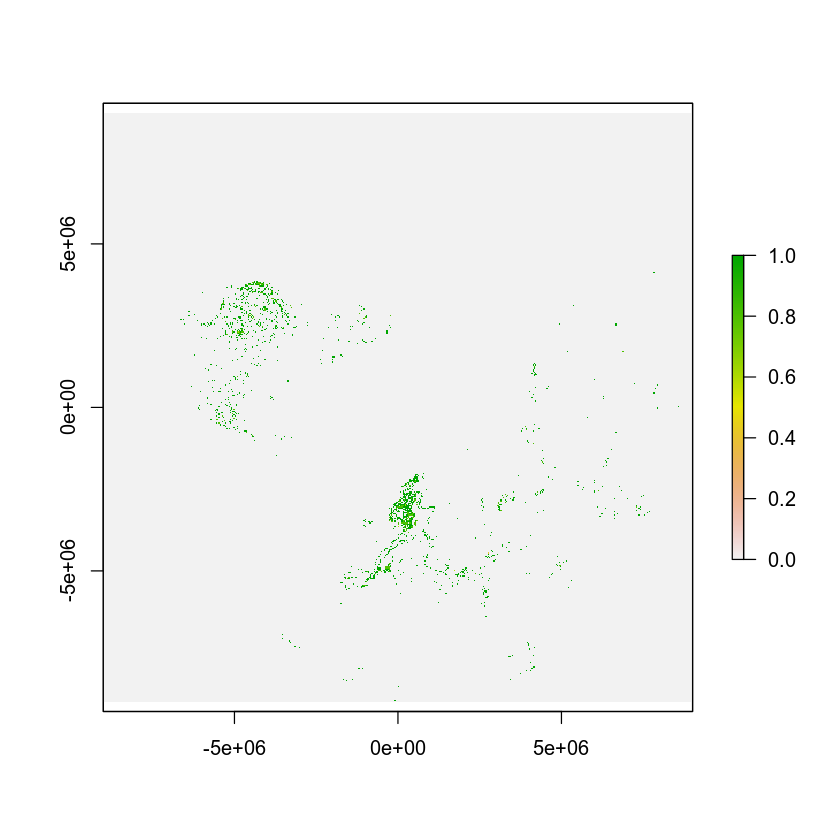

In [152]:
gbif.map <- map_fetch(source = "density", x = 0, y = 0, z = 0, 
                      format = "@2x.png", srs = "EPSG:4326", bin = NULL,
                      hexPerTile = NULL, squareSize = NULL,
                      style = "classic.point", taxonKey = NULL,
                      datasetKey = NULL, country = "KE", publishingOrg = NULL, 
                      publishingCountry = NULL, year = NULL, basisOfRecord = NULL)
plot(gbif.map)
z <- map_fetch(taxonKey = 2480498, year = 2010, srs = "EPSG:3575")
  plot(z)

### **Spin up a download request for GBIF occurrence data**

In [7]:
# To avoid regenerating a new dowload key, use the next code to use an already set dowload key
dowload_key <- occ_download(paste("taxonKey=",key),
                            format = "DWCA",
                            user = GBIF_USER,
                            pwd = GBIF_PWD,
                            email = GBIF_EMAIL)
dowload.key <- dowload_key[1]
#dowload.key <- "0002478-200127171203522"
dowload.key

[1] "0008858-200127171203522"

In [76]:
# To avoid regenerating a new dowload key, use the next code to use an already set dowload key
dowload_key1 <- occ_download(paste("taxonKey=",key),
                            format = "SIMPLE_CSV",
                            user = GBIF_USER,
                            pwd = GBIF_PWD,
                            email = GBIF_EMAIL)
dowload.key1 <- dowload_key1[1]
#dowload.key <- "0002478-200127171203522"
dowload.key1

[1] "0008870-200127171203522"

In [50]:
dowload.key <- "0008858-200127171203522"
# 0002478-200127171203522

### **Downloading the data from the database.**
wait fro some minutes for the download request to be processed

In [51]:
gbif_dowload <- occ_download_get(dowload.key,
                                 path = output_file_dir, 
                                 overwrite = T )
res.zip <- paste(output_file_dir, "/", dowload.key, ".zip", sep = "")
unzip(res.zip, exdir = output_file_dir, overwrite = TRUE)

Download file size: 36.53 MB

On disk at /home/kibet/bioinformatics/github/co1_metaanalysis/data/input/gbif/psychodidae-9164/0008858-200127171203522.zip



In [80]:
occ_download_get(dowload.key1, path = output_file_dir, overwrite = T)
res1.zip <- paste(output_file_dir, "/", dowload.key1, ".zip", sep = "")
unzip(res1.zip, exdir = output_file_dir, overwrite = TRUE)

Download file size: 11.93 MB

On disk at /home/kibet/bioinformatics/github/co1_metaanalysis/data/input/gbif/psychodidae-9164/0008870-200127171203522.zip



<<gbif downloaded get>>
  Path: /home/kibet/bioinformatics/github/co1_metaanalysis/data/input/gbif/psychodidae-9164/0008870-200127171203522.zip
  File size: 11.93 MB

### **N/B: Remember to download either of the files concurrently to ensure that they have the same records**

### **Citations from GBIF**
This includes individual DOIs for the data, citations for every individual dataset included.

In [78]:
gbif_citation(gbif_dowload)

$download
[1] "GBIF Occurrence Download https://doi.org/10.15468/dl.byeqt5 Accessed from R via rgbif (https://github.com/ropensci/rgbif) on 2020-02-10"

$datasets
$datasets[[1]]
<<rgbif citation>>
   Citation: Merseyside BioBank (2018). Merseyside BioBank (unverified).
        Occurrence dataset https://doi.org/10.15468/iou2ld accessed via
        GBIF.org on 2020-02-10.. Accessed from R via rgbif
        (https://github.com/ropensci/rgbif) on 2020-02-10
   Rights: This work is licensed under a Creative Commons Attribution Non
        Commercial (CC-BY-NC) 4.0 License.

$datasets[[2]]
<<rgbif citation>>
   Citation: Norfolk Biodiversity Information Service (2017). NBIS Records to
        December 2016. Occurrence dataset https://doi.org/10.15468/jca5lo
        accessed via GBIF.org on 2020-02-10.. Accessed from R via rgbif
        (https://github.com/ropensci/rgbif) on 2020-02-10
   Rights: This work is licensed under a Creative Commons Attribution Non
        Commercial (CC-BY-NC) 4.0

## **Loading the dowloaded file to an R session**
Using  tidyverse

#### 1. **The easy SIMPLE_CSV download**

In [6]:
dowload.key1 = "0008870-200127171203522"
#res.csv <- as.download(paste(output_file, "/", dowload.key1, ".csv", sep = ""))
res.csv <- paste(output_file_dir, "/", dowload.key1, ".csv", sep = "")
gbif_data <- read.delim(res.csv, stringsAsFactors = F, header = T,
                        na.strings = "", quote = "")

In [7]:
nrow(gbif_data)

[1] 177571

#### 2. **The DWCA format download, comes as a compressed .zip file.**  
Made up of  
    **a.** A citations.txt file that lists citations of datasets included in the download  
    **b.** A "dataset" directory with .xml files describing all datasets in the download  
    **c.** A metadata.xml file  
    **d.** A meta.xml file  
    **e.** A multimedia.txt file  
    **f.** A occurrence.txt file - The main file with data  
    **g.** A rights.txt file  
    **h.** A verbatim.txt file - Has important data just like f. above  

#### **f. Loading occurrence.txt**

In [8]:
occ.tsv <- paste(output_file_dir, "/", "occurrence.txt", sep = "")
gbif_occ <- read.delim(occ.tsv, stringsAsFactors = F, header = T,
                       na.strings = "", sep = "\t", quote = "")

In [9]:
nrow(gbif_occ)

[1] 177571

#### **h. Loading verbatim.txt**
NB: Not very important but can be used as an alternative to occurrence.txt. However, use of the later (occurrence.txt) is highly encouraged

In [10]:
verb.tsv <- paste(output_file_dir, "/", "verbatim.txt", sep = "")
gbif_verb <- read.delim(verb.tsv, stringsAsFactors = F, header = T,
                        na.strings = "", quote = "")

In [11]:
nrow(gbif_verb)

[1] 177571

## **Analysing GBIF data based on occurrence.txt and SIMPLE_CSV**  
For GenBank accessesion codes, the `associatedSequences` field in darwincore format serves that purpose  
### 1. First, extract Rows with associated sequences from occurrence.txt

In [12]:
gbif_seq <- subset(gbif_occ, !is.na(associatedSequences))
nrow(gbif_seq)

[1] 34973

In [13]:
str(gbif_seq)

'data.frame':	34973 obs. of  237 variables:
 $ gbifID                             : num  2.31e+09 2.31e+09 2.31e+09 2.31e+09 2.31e+09 ...
 $ abstract                           : logi  NA NA NA NA NA NA ...
 $ accessRights                       : chr  NA NA NA NA ...
 $ accrualMethod                      : logi  NA NA NA NA NA NA ...
 $ accrualPeriodicity                 : logi  NA NA NA NA NA NA ...
 $ accrualPolicy                      : logi  NA NA NA NA NA NA ...
 $ alternative                        : logi  NA NA NA NA NA NA ...
 $ audience                           : logi  NA NA NA NA NA NA ...
 $ available                          : logi  NA NA NA NA NA NA ...
 $ bibliographicCitation              : chr  NA NA NA NA ...
 $ conformsTo                         : logi  NA NA NA NA NA NA ...
 $ contributor                        : logi  NA NA NA NA NA NA ...
 $ coverage                           : logi  NA NA NA NA NA NA ...
 $ created                            : chr  "2016-09-26" "2

### 2. Second, extract records from SIMPLE_CSV file with associatedSequences based on filtered gbifIDs above

In [14]:
gbif_data_seq <- subset(gbif_data, gbifID %in% gbif_seq$gbifID)

In [63]:
str(gbif_data_seq)

'data.frame':	34973 obs. of  50 variables:
 $ gbifID                          : num  1.42e+09 1.42e+09 1.42e+09 1.42e+09 2.25e+09 ...
 $ datasetKey                      : chr  "040c5662-da76-4782-a48e-cdea1892d14c" "040c5662-da76-4782-a48e-cdea1892d14c" "040c5662-da76-4782-a48e-cdea1892d14c" "040c5662-da76-4782-a48e-cdea1892d14c" ...
 $ occurrenceID                    : chr  "http://bins.boldsystems.org/index.php/Public_RecordView?processid=NCCA1880-11" "http://bins.boldsystems.org/index.php/Public_RecordView?processid=NGAAB284-14" "http://bins.boldsystems.org/index.php/Public_RecordView?processid=PAOCT024-12" "http://bins.boldsystems.org/index.php/Public_RecordView?processid=PHOCT390-11" ...
 $ kingdom                         : chr  "Animalia" "Animalia" "Animalia" "Animalia" ...
 $ phylum                          : chr  "Arthropoda" "Arthropoda" "Arthropoda" "Arthropoda" ...
 $ class                           : chr  "Insecta" "Insecta" "Insecta" "Insecta" ...
 $ order                

### 3. Merge The two dataframes avoiding any dublicate columns

In [15]:
gbif_data.seq <- merge(gbif_data_seq, gbif_seq, 
                       sort = T, all=T)

In [19]:
str(gbif_data.seq)

'data.frame':	34973 obs. of  240 variables:
 $ gbifID                             : num  1.14e+09 1.14e+09 1.14e+09 1.14e+09 1.14e+09 ...
 $ datasetKey                         : chr  "09e90dfb-5b1b-4dd9-a796-e2fba53d26f0" "09e90dfb-5b1b-4dd9-a796-e2fba53d26f0" "09e90dfb-5b1b-4dd9-a796-e2fba53d26f0" "09e90dfb-5b1b-4dd9-a796-e2fba53d26f0" ...
 $ occurrenceID                       : chr  "BIOUG22365-A01" "BIOUG22237-G05" "BIOUG22299-E06" "BIOUG21483-D06" ...
 $ kingdom                            : chr  "Animalia" "Animalia" "Animalia" "Animalia" ...
 $ phylum                             : chr  "Arthropoda" "Arthropoda" "Arthropoda" "Arthropoda" ...
 $ class                              : chr  "Insecta" "Insecta" "Insecta" "Insecta" ...
 $ order                              : chr  "Diptera" "Diptera" "Diptera" "Diptera" ...
 $ family                             : chr  "Psychodidae" "Psychodidae" "Psychodidae" "Psychodidae" ...
 $ genus                              : chr  "Psychoda" "Psycho

### 4. Creating a dataframe of gbifID, assocuiatedSequences and adding six new columns to it:  BOLDprocessiduri, BOLDprocessid, BOLDclusteruri, BOLDcluster, GenBankuri, GenBank

In [16]:
dplyr::select(gbif_data.seq, gbifID, associatedSequences) %>% 
mutate(BOLDprocessiduri = NA_character_, BOLDprocessid = NA_character_,
       BOLDclusteruri = NA_character_, BOLDcluster = NA_character_, 
       GenBankuri = NA_character_, GenBank = NA_character_) -> genbank

In [74]:
str(genbank)
genbank

'data.frame':	35505 obs. of  8 variables:
 $ gbifID             : num  1.14e+09 1.14e+09 1.14e+09 1.14e+09 1.14e+09 ...
 $ associatedSequences: chr  "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15|http://bins.boldsystems.org/index."| __truncated__ "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15|http://bins.boldsystems.org/index"| __truncated__ "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15|http://bins.boldsystems.org/index."| __truncated__ "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFA137-15|http://bins.boldsystems.org/index."| __truncated__ ...
 $ BOLDprocessiduri   : chr  "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15" "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15" "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15" "http://www.boldsystems.org/index.php/Public_RecordView?processi

gbifID,associatedSequences,BOLDprocessiduri,BOLDprocessid,BOLDclusteruri,BOLDcluster,GenBankuri,GenBank
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1135180385,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,NA,NA,NA
1135180396,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,NA,NA,NA
1135180398,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9316,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9316,NA,NA,NA
1135180400,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFA137-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:ABU5546,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFA137-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:ABU5546,NA,NA,NA
1135180402,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPG234-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPG234-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,NA,NA,NA
1135180403,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG488-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG488-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,NA,NA,NA
1135180404,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE768-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE768-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,NA,NA,NA
1135180405,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC231-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC231-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,NA,NA,NA
1135180406,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG061-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9317,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG061-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9317,NA,NA,NA


### 5. Adding values to the BOLDprocessiduri, BOLDclusteruri, GenBankuri columns of the genbank dataframe

In [17]:
BOLD_process <- "processid="
BOLD_cluster <- "clusteruri="
genbank_acce <- "nuccore|^[:upper:]{2}[:digit:]{6}$"
n <- 1
while(n <= nrow(genbank)) {
    for(i in unlist(strsplit(as.character(genbank$associatedSequences[n]),'\\|'))) {
        if (stringr::str_detect(i, BOLD_process)) {
            genbank[n, "BOLDprocessiduri"] <- i
        } else if (stringr::str_detect(i, BOLD_cluster)) {
            genbank[n, "BOLDclusteruri"] <- i
        } else if (stringr::str_detect(i, genbank_acce)) {
            genbank[n, "GenBankuri"] <- i
        } else {
            cat("\n\nThe value in ", n," position of genbank$associatedSequences",
                " does not fit any pattern or is empty \n\t>>", i)
            genbank$BOLDprocessiduri[n] <- NA_character_
            genbank$BOLDclusteruri[n] <- NA_character_
            genbank$GenBankuri[n] <- NA_character_
        }
    }
    n <- n+1
}
#df$class <- as.integer(grepl('comp', df$target_id))

In [91]:
str(genbank)
genbank

'data.frame':	34973 obs. of  8 variables:
 $ gbifID             : num  1.14e+09 1.14e+09 1.14e+09 1.14e+09 1.14e+09 ...
 $ associatedSequences: chr  "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15|http://bins.boldsystems.org/index."| __truncated__ "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15|http://bins.boldsystems.org/index"| __truncated__ "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15|http://bins.boldsystems.org/index."| __truncated__ "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFA137-15|http://bins.boldsystems.org/index."| __truncated__ ...
 $ BOLDprocessiduri   : chr  "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15" "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15" "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15" "http://www.boldsystems.org/index.php/Public_RecordView?processi

gbifID,associatedSequences,BOLDprocessiduri,BOLDprocessid,BOLDclusteruri,BOLDcluster,GenBankuri,GenBank
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1135180385,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,NA,NA,NA
1135180396,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,NA,NA,NA
1135180398,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9316,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9316,NA,NA,NA
1135180400,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFA137-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:ABU5546,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFA137-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:ABU5546,NA,NA,NA
1135180402,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPG234-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPG234-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,NA,NA,NA
1135180403,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG488-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG488-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,NA,NA,NA
1135180404,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE768-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE768-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,NA,NA,NA
1135180405,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC231-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC231-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,NA,NA,NA
1135180406,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG061-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9317,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG061-15,NA,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9317,NA,NA,NA


Test code for the above code

In [95]:
### Test datasets --- row numbers (n) and their respective (genbank$associatedSequences[n])
# 9 'http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG061-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9317'
# 11 'http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFI851-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581|http://www.ncbi.nlm.nih.gov/nuccore/'
# 45 'http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE614-15'
# 93 'https://www.ncbi.nlm.nih.gov/nuccore/HM433828-SUPPRESSED'
# 100 'https://www.ncbi.nlm.nih.gov/nuccore/GU694814-SUPPRESSED'
# 9487 'GenBank: KP112598.1 https://www.ncbi.nlm.nih.gov/nuccore/807201818'
# 9488 'GenBank: KP112599.1 https://www.ncbi.nlm.nih.gov/nuccore/807201820'
# 9489 'GenBank: KP112608.1 https://www.ncbi.nlm.nih.gov/nuccore/807201838'
# 20376 'http://www.boldsystems.org/index.php/Public_RecordView?processid=SSEIA6580-13| https://www.ncbi.nlm.nih.gov/nuccore/630[0n]| http://v4.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9320'
# 20469 'http://www.boldsystems.org/index.php/Public_RecordView?processid=CNGLE385-13| https://www.ncbi.nlm.nih.gov/nuccore/629[0n]| http://v4.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9320'
# 22147 'https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041'
# 23808 'KR987757'
# 23809 'KM937463'
# 23810 'KT118178'
n <- 22147
y <- n

BOLD_process <- "processid="
BOLD_cluster <- "clusteruri="
genbank_acce <- "nuccore|^[:upper:]{2}[:digit:]{6}$"

genbank$associatedSequences[n]
while(n <= y){
    for(x in unlist(strsplit(as.character(genbank$associatedSequences[n]),'\\|'))) {
        if(stringr::str_detect(x, BOLD_process)) {
            cat(paste("'", BOLD_process, "' is Found in:\n", n, x, "\n\n" ))
        } else if(stringr::str_detect(x, BOLD_cluster)) {
            cat(paste("'", BOLD_cluster, "' is Found in:\n", n, x, "\n\n" ))
        } else if(stringr::str_detect(x, genbank_acce)) {
            cat(paste("'", genbank_acce, "' is Found in:\n", n, x, "\n\n" ))
        } else {
            print("\nNo match found")
        }
    }
    n <- n+1
}

[1] "https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041"

' nuccore|^[:upper:]{2}[:digit:]{6}$ ' is Found in:
 22147 https://www.ncbi.nlm.nih.gov/nuccore/NC_028041  

' nuccore|^[:upper:]{2}[:digit:]{6}$ ' is Found in:
 22147  https://www.ncbi.nlm.nih.gov/nuccore/NC_028041  

' nuccore|^[:upper:]{2}[:digit:]{6}$ ' is Found in:
 22147  https://www.ncbi.nlm.nih.gov/nuccore/NC_028041  

' nuccore|^[:upper:]{2}[:digit:]{6}$ ' is Found in:
 22147  https://www.ncbi.nlm.nih.gov/nuccore/NC_028041  

' nuccore|^[:upper:]{2}[:digit:]{6}$ ' is Found in:
 22147  https://www.ncbi.nlm.nih.gov/nuccore/NC_028041  

' nuccore|^[:upper:]{2}[:digit:]{6}$ ' is Found in:
 22147  https://www.ncbi.nlm.nih.gov/nuccore/NC_028041  

' nuccore|^[:upper:]{2}[:digit:]{6}$ ' is Found in:
 22147  https://www.ncbi.nlm.nih.gov/nuccore/NC_028041  

' nuccore|^[:upper:]{2}[:digit:]{6}$ ' is Found in:
 22147  https://www.ncbi.nlm.nih.gov/nuccore/NC_028041  

' nuccore|^[:upper:]{2}[:digit:]{6}$ ' is Found in:
 22147  https://www.ncbi.nlm.nih.gov/nuccore/NC_028041  

' nuccore|^

### 6. Adding values to the BOLDprocessid, BOLDcluster, GenBank columns of the genbank dataframe

In [18]:
BOLD_processID <- "^[:upper:]{4,6}[:digit:]{1,6}-[:digit:]{2}$"
BOLD_clusterID <- "^BOLD:[:alnum:]{3,10}$"
genbank_accession <- "^[:upper:]{1,2}_?[:digit:]{5,8}\\.?[:digit:]?$"
n <- 1
while(n <= nrow(genbank)) {
    if(!is.na(genbank$BOLDprocessiduri[n])) for(i in unlist(strsplit(as.character(genbank$BOLDprocessiduri[n]),'processid='))) {
        if (stringr::str_detect(i, BOLD_processID)) {
            genbank[n, "BOLDprocessid"] <- i
        } else {
            genbank[n, "BOLDprocessid"] <- NA_character_
        }
    }
    if(!is.na(genbank$BOLDclusteruri[n])) for(i in unlist(strsplit(as.character(genbank$BOLDclusteruri[n]),'clusteruri='))) {
        if (stringr::str_detect(i, BOLD_clusterID)) {
            genbank[n, "BOLDcluster"] <- i
        } else {
            genbank[n, "BOLDcluster"] <- NA_character_
        }
    }
    if(!is.na(genbank$GenBankuri[n])) for(i in unlist(strsplit(as.character(genbank$GenBankuri[n]),'nuccore/|\\s|-SUPPRESSED'))) {
        if (stringr::str_detect(i, genbank_accession)) {
            genbank[n, "GenBank"] <- i
        } else {
            genbank[n, "GenBank"] <- NA_character_
        }
    }
    n <- n+1
}

In [96]:
str(genbank)
genbank

'data.frame':	34973 obs. of  8 variables:
 $ gbifID             : num  1.14e+09 1.14e+09 1.14e+09 1.14e+09 1.14e+09 ...
 $ associatedSequences: chr  "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15|http://bins.boldsystems.org/index."| __truncated__ "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15|http://bins.boldsystems.org/index"| __truncated__ "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15|http://bins.boldsystems.org/index."| __truncated__ "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFA137-15|http://bins.boldsystems.org/index."| __truncated__ ...
 $ BOLDprocessiduri   : chr  "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15" "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15" "http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15" "http://www.boldsystems.org/index.php/Public_RecordView?processi

gbifID,associatedSequences,BOLDprocessiduri,BOLDprocessid,BOLDclusteruri,BOLDcluster,GenBankuri,GenBank
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1135180385,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE163-15,RRMFE163-15,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,BOLD:AAF9314,NA,NA
1135180396,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPC1309-15,RRMPC1309-15,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,BOLD:AAF9314,NA,NA
1135180398,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9316,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC937-15,RRMFC937-15,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9316,BOLD:AAF9316,NA,NA
1135180400,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFA137-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:ABU5546,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFA137-15,RRMFA137-15,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:ABU5546,BOLD:ABU5546,NA,NA
1135180402,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPG234-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMPG234-15,RRMPG234-15,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,BOLD:AAP4581,NA,NA
1135180403,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG488-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG488-15,RRMFG488-15,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,BOLD:AAF9314,NA,NA
1135180404,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE768-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE768-15,RRMFE768-15,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581,BOLD:AAP4581,NA,NA
1135180405,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC231-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFC231-15,RRMFC231-15,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9314,BOLD:AAF9314,NA,NA
1135180406,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG061-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9317,http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG061-15,RRMFG061-15,http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9317,BOLD:AAF9317,NA,NA


### 7. Test code for the code above

In [97]:
n <- 20376
# 9 
# 11 'http://www.ncbi.nlm.nih.gov/nuccore/'
# 93 'https://www.ncbi.nlm.nih.gov/nuccore/HM433828-SUPPRESSED'
# 100 'https://www.ncbi.nlm.nih.gov/nuccore/GU694814-SUPPRESSED'
# 9487 'GenBank: KP112598.1 https://www.ncbi.nlm.nih.gov/nuccore/807201818'
# 9488 'GenBank: KP112599.1 https://www.ncbi.nlm.nih.gov/nuccore/807201820'
# 9489 'GenBank: KP112608.1 https://www.ncbi.nlm.nih.gov/nuccore/807201838'
# 20376 ' https://www.ncbi.nlm.nih.gov/nuccore/630[0n]'
# 20469 ' https://www.ncbi.nlm.nih.gov/nuccore/629[0n]'
# 22147 ' https://www.ncbi.nlm.nih.gov/nuccore/NC_028041'
# 23808 'KR987757'
# 23809 'KM937463'
# 23810 'KT118178'

genbank$GenBankuri[n]
if(!is.na(genbank$GenBankuri[n])) for(i in unlist(strsplit(as.character(genbank$GenBankuri[n]), "nuccore/|\\s|-SUPPRESSED"))) {
    print(i)
    if (stringr::str_detect(i, genbank_accession)) {
        cat(i, n, "\n")
    }
}


[1] " https://www.ncbi.nlm.nih.gov/nuccore/630[0n]"

[1] ""
[1] "https://www.ncbi.nlm.nih.gov/"
[1] "630[0n]"


### 8. Merging genbank dataframe: Has URLs (BOLDprocessiduri, BOLDclusteruri and Genbankuri) and identifiers(BOLDprocessid, BOLDcluster and GenBank accession numbers) with gbif_data.seq dataframe: Has 240 variables

In [20]:
gbifAssociatedSequences <- merge(gbif_data.seq, genbank, 
                       sort = T, all=T)

In [51]:
headers.df <- dplyr::select(gbifAssociatedSequences, gbifID, BOLDprocessid, GenBank, 
                            phylum, class, order, family, genus, species, 
                            countryCode, locality, decimalLatitude, decimalLongitude, elevation)

In [44]:
as.data.frame(table(c(headers.df$genus)))

Var1,Freq
<fct>,<int>
Alexanderia,5
Atrichobrunettia,4
Bazarella,6
Berdeniella,12
Bichromomyia,21
Brumptomyia,101
Brunettia,2
Chinius,4
Clytocerus,1


In [35]:
unique(gbifAssociatedSequences$family)
as.data.frame(table(c(gbifAssociatedSequences$genus)))

[1] "Psychodidae"

Var1,Freq
<fct>,<int>
Alexanderia,5
Atrichobrunettia,4
Bazarella,6
Berdeniella,12
Bichromomyia,21
Brumptomyia,101
Brunettia,2
Chinius,4
Clytocerus,1


In [53]:
nrow(gbifAssociatedSequences)
names(gbifAssociatedSequences)
#c(gbifAssociatedSequences$locality)

[1] 34973

[1] "gbifID"                             
  [2] "associatedSequences"                
  [3] "datasetKey"                         
  [4] "occurrenceID"                       
  [5] "kingdom"                            
  [6] "phylum"                             
  [7] "class"                              
  [8] "order"                              
  [9] "family"                             
 [10] "genus"                              
 [11] "species"                            
 [12] "infraspecificEpithet"               
 [13] "taxonRank"                          
 [14] "scientificName"                     
 [15] "countryCode"                        
 [16] "locality"                           
 [17] "stateProvince"                      
 [18] "occurrenceStatus"                   
 [19] "individualCount"                    
 [20] "decimalLatitude"                    
 [21] "decimalLongitude"                   
 [22] "coordinateUncertaintyInMeters"      
 [23] "coordinatePrecision"                
 [24] "elevation"                          
 [25] "elevationAccuracy"                  
 [26] "depth"                              
 [27] "depthAccuracy"                      
 [28] "eventDate"                          
 [29] "day"                                
 [30] "month"                              
 [31] "year"                               
 [32] "taxonKey"                           
 [33] "speciesKey"                         
 [34] "basisOfRecord"                      
 [35] "institutionCode"                    
 [36] "collectionCode"                     
 [37] "catalogNumber"                      
 [38] "recordNumber"                       
 [39] "identifiedBy"                       
 [40] "dateIdentified"                     
 [41] "license"                            
 [42] "rightsHolder"                       
 [43] "recordedBy"                         
 [44] "typeStatus"                         
 [45] "establishmentMeans"                 
 [46] "lastInterpreted"                    
 [47] "mediaType"                          
 [48] "issue"                              
 [49] "verbatimScientificName"             
 [50] "verbatimScientificNameAuthorship"   
 [51] "publishingOrgKey"                   
 [52] "abstract"                           
 [53] "accessRights"                       
 [54] "accrualMethod"                      
 [55] "accrualPeriodicity"                 
 [56] "accrualPolicy"                      
 [57] "alternative"                        
 [58] "audience"                           
 [59] "available"                          
 [60] "bibliographicCitation"              
 [61] "conformsTo"                         
 [62] "contributor"                        
 [63] "coverage"                           
 [64] "created"                            
 [65] "creator"                            
 [66] "date"                               
 [67] "dateAccepted"                       
 [68] "dateCopyrighted"                    
 [69] "dateSubmitted"                      
 [70] "description"                        
 [71] "educationLevel"                     
 [72] "extent"                             
 [73] "format"                             
 [74] "hasFormat"                          
 [75] "hasPart"                            
 [76] "hasVersion"                         
 [77] "identifier"                         
 [78] "instructionalMethod"                
 [79] "isFormatOf"                         
 [80] "isPartOf"                           
 [81] "isReferencedBy"                     
 [82] "isReplacedBy"                       
 [83] "isRequiredBy"                       
 [84] "isVersionOf"                        
 [85] "issued"                             
 [86] "language"                           
 [87] "mediator"                           
 [88] "medium"                             
 [89] "modified"                           
 [90] "provenance"                         
 [91] "publisher"                         

### 9. Filtering out records with BOLD ProcessIDs - Sequences contained in BOLD database.

In [31]:
gbif_genbank <- subset(gbifAssociatedSequences, is.na(BOLDprocessid))
gbif_BOLD <- subset(gbifAssociatedSequences, !is.na(BOLDprocessid))

gbif_genbank1 <- subset(gbifAssociatedSequences, !(GenBank %in% gbif_BOLD$GenBank))

In [34]:
as.data.frame(table(c(subset(gbif_genbank1, is.na(BOLDprocessid))$genus)))

Var1,Freq
<fct>,<int>
Alexanderia,5
Atrichobrunettia,4
Bazarella,6
Berdeniella,12
Bichromomyia,20
Brumptomyia,58
Brunettia,2
Chinius,4
Clytocerus,1


In [163]:
cat("\n", nrow(gbif_genbank), "records do not have BOLD processIDs,", nrow(gbif_BOLD),
    "records have BOLD processID to make a total of", nrow(gbifAssociatedSequences),
    "records with associated sequences.")


 25821 records do not have BOLD processIDs, 9152 records have BOLD processID to make a total of 34973 records with associated sequences.

In [162]:
cat("\n There are", length(unique(gbifAssociatedSequences$GenBank)),
    "unique GenBank accession numbers,", 
    length(unique(gbif_genbank$GenBank)),
    "are associated with records without BOLD ProcessIDs and",
    length(unique(gbif_BOLD$GenBank)),
    "are associated with records with BOLD processIDS")


 There are 13927 unique GenBank accession numbers, 13920 are associated with records without BOLD ProcessIDs and 9016 are associated with records with BOLD processIDS

In [164]:
cat(nrow(gbif_genbank1),"Records have GenBank accession numbers of which",
    length(unique(gbif_genbank1$GenBank)), "records have unique accession numbers")

7359 Records have GenBank accession numbers of which 4911 records have unique accession numbers

## **Extracting GenBank accesion codes**

In [165]:
genebank_accessions <- genbank$GenBank
gbif_genbank_accessions <- gbif_genbank1$GenBank

In [167]:
cat("\nOf the", length(genebank_accessions), "records with associated sequences",
    length(genebank_accessions[!is.na(genebank_accessions)]),
    "records have GenBank accession numbers and of this",
    length(unique(genebank_accessions[!is.na(genebank_accessions)])),
    "accession numbers are unique with only",
    length(unique(gbif_genbank_accessions)),
    "unique records not linked to any BOLDprocessIDs")
genbankAccessionNumbers <- unique(genebank_accessions[!is.na(genebank_accessions)])
gbif_genbank_AccessionNos <- unique(gbif_genbank_accessions)


Of the 34973 records with associated sequences 34304 records have GenBank accession numbers and of this 13926 accession numbers are unique with only 4911 unique records not linked to any BOLDprocessIDs

## Writing the dataframes to tables in the drive location

In [ ]:
setwd(output_file_dir)
#Writing the dataframe gbifAssociatedSequences to file
write.table(gbifAssociatedSequences,
            file = paste(search_name, "_gbifAssociatedSequences.tsv", sep =""),
            row.names = FALSE, col.names= TRUE, sep = "\t", quote=FALSE )
#writing the vector genbankAccessionNumbers to file
writeLines(genbankAccessionNumbers,
            con = paste(search_name, "_genbankAccessionNumbers.txt", sep =""),
            sep = "\n" )
#Writing the vector gbif_genbank_AccessionNos
writeLines(gbif_genbank_AccessionNos,
            con = paste(search_name, "_minusBOLD_genbankAccessionNumbers.txt", sep =""),
            sep = "\n" )

#Writing the dataframe headers to a FASTA format to file
write.table(headers.df,
            file = paste(search_name, "_gbifheaders.tsv", sep =""),
            row.names = FALSE, col.names= TRUE, sep = "\t", quote=FALSE )

In [52]:
#awk 'BEGIN{FS="\t"; OFS="|"} NR == 1 {next} {gsub(/\|/, ";")} { print ">"$2"("$3";"$1")",$4,$5,$6,"fam-"$7,"subfam-NA","tri-NA","gs-"$8,"sp-"$9,"country-"$10,"exactsite-"$11, "lat_"$12, "lon_"$13, "elev-"$14}' psychodidae_gbifheaders.tsv | less -S